# 토픽 모델링
- 토픽 모델링은 문서 집합에 내재한 토픽(주제)을 찾아내는 방법
- 문서 분류가 텍스트 내용을 예측하는 것이 목적이었다면, 토픽 모델링은 예측보다 분석을 목적으로 함
- 대표적인 알고리즘: LDA(Latent Dirichlet Allocation)

<br/>

## LDA(Latent Dirichlet Allocation, 잠재 디리클레 할당)
- 내재된 토픽을 유추하기 위한 통계적 방법론
- 기본 가정: 문서가 작성될 때, 문서를 구성하는 토픽이 존재하고 각 토픽은 단어의 집합으로 구성됨
- 즉, **문서가 토픽들의 혼합으로 구성되어져 있으며, 토픽들은 확률 분포(디리클레 분포)에 기반하여 단어들을 생성한다고 가정**
- 문서가 생성된 과정을 역추적함
- LSA와 마찬가지로 전처리된 DTM이 입력되어야 함 <br/>

[참고한 사이트](https://soojle.gitbook.io/project/requirements/undefined-1/undefined-3/lda) <br/>
[위키독스](https://wikidocs.net/30708)

<br/><br/>

## LDA 모형의 구조
<br/>

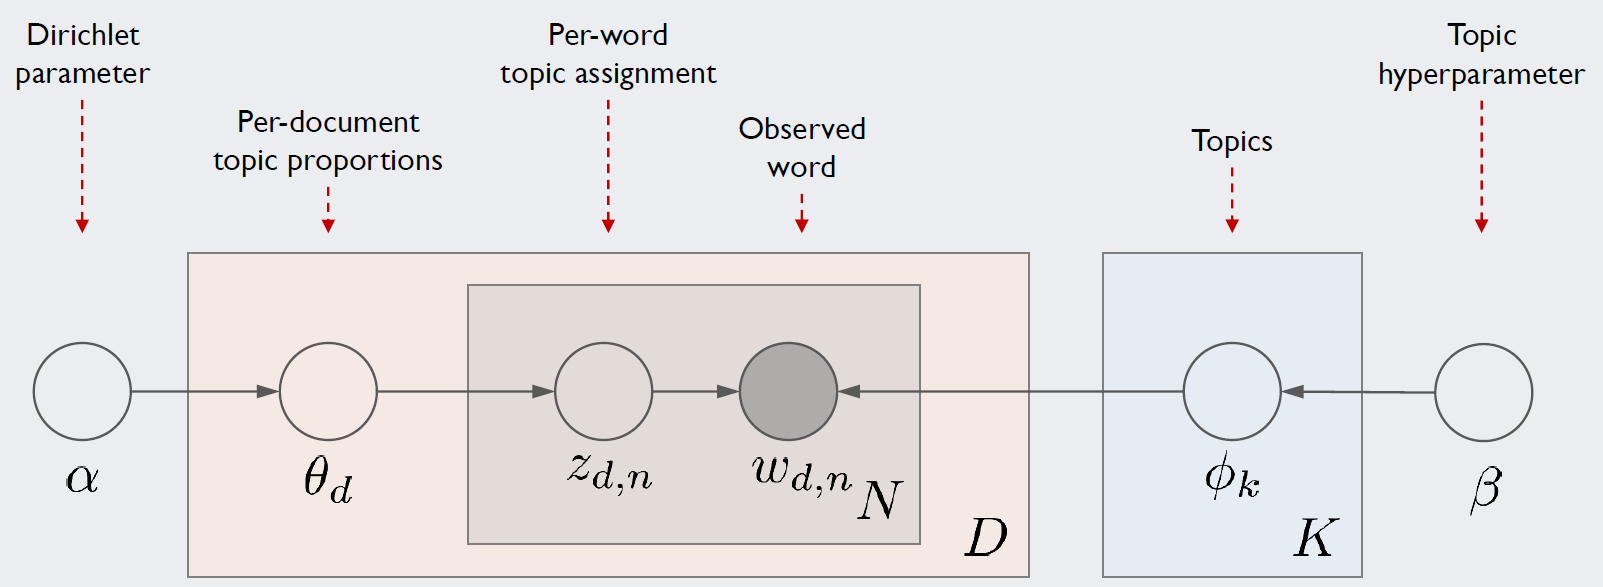

- D: 전체 문서 개수
- N: d번째 문서의 단어 수
- θ: 문서의 토픽 분포, 디리클레 분포를 따름
- K: 전체 토픽 수(하이퍼 파라미터)
- φ: 각 토픽의 단어 분포, 디리클레 분포를 따름
- Z: 단어 W가 속한 토픽

> ### 디리클레 분포
> - 연속 확률분포의 하나로, k차원의 실수 벡터에서 각 벡터 값이 양수이고 **모든 값을 더하면 1이 되는 경우**에 대해 확률값이 정의됨
> - ex) K가 3일 때, 확률변수는 [0.5, 0.3, 0.2]와 같은 값을 가질 수 있음

## LDA의 수행과정
### 1. 하이퍼 파라미터인 토픽의 개수 K를 할당
### 2. 모든 단어를 K개 중 하나의 토픽에 할당
- 모든 문서의 모든 단어에 대해서 k개 중 하나의 토픽을 랜덤으로 할당 <br/>

### 3. 모든 문서의 모든 단어에 대해 두 가지 기준에 따라 단어 W의 토픽을 재할당
- **p(topic t | document d)** : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
- **p(word w | topic t)** : 각 토픽들 t에서 해당 단어 w의 분포

ex) 두 문서 doc1, doc2가 있을 때 doc1의 세 번째 단어 apple의 토픽을 결정하려고 함 <br/>
<img src="https://wikidocs.net/images/page/30708/lda1.PNG"  align="left" width="350px" height="350px">

<br/> <br/> <br/> <br/> <br/> <br/> <br/> <br/> <br/> <br/>
첫 번째 기준: p(topic t | document d) <br/>

<img src="https://wikidocs.net/images/page/30708/lda3.PNG" align="left" width="350px" height="350px">
<br/> <br/> <br/> <br/> <br/> <br/> <br/> <br/> <br/>
문서 doc1의 단어들이 어떤 토픽에 해당하는지 살펴봄 <br/>
doc1의 모든 단어들은 토픽 A와 토픽 B에 50 대 50의 비율로 할당되어져 있으므로, 이 기준에 따르면 단어 apple은 토픽 A or 토픽 B 어디에도 속할 수 있음 <br/>

<br/> <br/> 
두 번째 기준: p(word w | topic t) <br/>

<img src="https://wikidocs.net/images/page/30708/lda2.PNG" align="left" width="350px" height="350px">
<br/> <br/> <br/> <br/> <br/> <br/> <br/> <br/>

apple이 전체 문서에서 어떤 토픽에 할당되어져 있는지 살펴봄 <br/> 
이 기준에 따르면 단어 apple은 토픽 B에 할당될 가능성이 높음

<hr>

<br/>

## 파라미터 도출을 위한 지표
- 토픽의 개수 K를 비롯해 α,β는 하이퍼 파라미터로 사용자가 직접 값을 넣어줘야 함
- 적절한 파라미터 값인지 판단하기 위한 적도로 혼란도(Perplexity)와 토픽 응집도(topic coherence)를 사용

## 혼란도(Perplexity)
- 특정 확률 모형이 실제 값을 얼마나 유사하게 예측하는지 평가
- 토픽 모델링에서는 추정한 디리클레 모형이 주어진 문서 집합을 얼마나 유사하게 생성하는지를 나타냄
- 값이 작을수록 좋음
- sklearn과 gensim 모두 지원

## 토픽 응집도(Topic coherence)
- 각 토픽에서 상위 비중을 차지하는 단어들이 의미적으로 유사한지 나타내는 척도
- 혼란도와 달리 값이 클수록 좋음
- gensim만 지원

<br/> <br/>

In [1]:
# 20 뉴스그룹 데이터를 이용해 토픽 모델링
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 'comp.sys.ibm.pc.hardware', 'sci.crypt']

# train 데이터셋만 가져옴
news_train = fetch_20newsgroups(subset='train', categories=categories)

print("Train size: ", len(news_train.data))
print("Categories: ", news_train.target_names)

Train size:  3219
Categories:  ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [2]:
# 카운트 벡터 생성
# LDA의 입력은 DTM이므로

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(news_train.data)

In [3]:
# LDA
# 주요 매개변수
# - n_components: 토픽의 수
# - max_iter: 알고리즘의 최대 반복 횟수, 기본값은 10
# - topic_word_prior: β를 의미, 토픽의 사전 단어분포를 결정하는 매개변수, 기본값은 1/n_components
# - doc_topic_prior: α를 의미, 문서의 사전 토픽분포를 결정하는 매개변수, 기본값은 1/n_components
# - learning_method: batch/online
# - n_jobs: 실행 시 사용하는 프로세서의 수, 기본값은 1

from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)      # 출력 설정: 소수 셋째 자리까지 출력

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수
                                max_iter=5, 
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='online', 
                                n_jobs= -1,       #사용할 프로세서 수, -1은 가능한 모든 프로세서 사용을 의미
                                random_state=0)

review_topics = lda.fit_transform(review_cv)    # 행: 각 문서, 열: 토픽의 비중 -> 각 문서별 토픽 분포
print('shape review_topics:', review_topics.shape)
print('Sample review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
print('Sum of topic weights of documents:', gross_topic_weights)

print('shape of topic word distribution:', lda.components_.shape)    ### lda.components_: 토픽별 단어의 분포

shape review_topics: (3219, 10)
Sample review_topics: [0.903 0.007 0.027 0.008 0.007 0.008 0.007 0.007 0.007 0.018]
Sum of topic weights of documents: [0.087 0.083 0.085 0.115 0.115 0.126 0.098 0.072 0.07  0.148]
shape of topic word distribution: (10, 2000)


In [9]:
# 각 토픽별 비중이 높은 단어 10개 추출 -> components_ 속성을 이용

def print_top_words(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print("Topic #%d: " % idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: com, morality, keith, article, sgi, think, sandvik, objective, caltech, moral
Topic #1: image, file, graphics, files, ftp, available, software, use, data, mail
Topic #2: space, nasa, access, launch, earth, orbit, shuttle, digex, lunar, satellite
Topic #3: article, com, just, don't, like, i'm, nntp, university, host, posting
Topic #4: key, clipper, chip, encryption, com, government, law, keys, use, escrow
Topic #5: scsi, com, bit, ibm, bus, know, windows, thanks, card, university
Topic #6: host, gov, nntp, posting, university, distribution, nasa, ___, world, com
Topic #7: drive, com, disk, hard, controller, drives, dos, tape, floppy, problem
Topic #8: key, public, message, faq, mail, pgp, des, group, uni, ripem
Topic #9: god, people, don't, jesus, believe, just, does, say, think, know



n_components: 6, perplexity: 1058.260
n_components: 7, perplexity: 1055.111
n_components: 8, perplexity: 1018.328
n_components: 9, perplexity: 1017.749
n_components: 10, perplexity: 1028.686
n_components: 11, perplexity: 1033.398
n_components: 12, perplexity: 1032.112
n_components: 13, perplexity: 1038.642
n_components: 14, perplexity: 1038.627
n_components: 15, perplexity: 1044.712


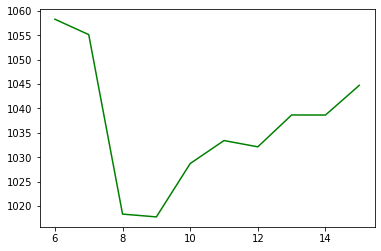

n_components with minimum perplexity: 9


In [11]:
# 토픽 수 선택하기
import matplotlib.pyplot as plt
%matplotlib inline

# 혼란도 값 시각화
def show_perplexity(cv, start, end, max_iter=5, topic_word_prior=0.1, doc_topic_prior=1.0):
    iter_num = []   # 반복횟수
    per_value = []  # 혼란도
    
    for i in range(start, end+1):
        lda = LatentDirichletAllocation(n_components = i, #추출할 topic의 수
                                max_iter=max_iter, 
                                topic_word_prior=topic_word_prior, doc_topic_prior=doc_topic_prior,
                                learning_method='batch', 
                                n_jobs= -1,       #사용할 프로세서 수, -1은 가능한 모든 프로세서 사용을 의미
                                random_state=7)
        
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')
        
    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start+per_value.index(min(per_value))   # 혼란도 값이 가장 작은 토픽 값 리턴

print("n_components with minimum perplexity:", show_perplexity(review_cv, start=6, end=15))

In [12]:
# 토픽 수를 9로 지정해서 다시 lda
lda = LatentDirichletAllocation(n_components = 9, #추출할 topic의 수
                                max_iter=20, 
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='batch', 
                                n_jobs= -1,       #사용할 프로세서 수, -1은 가능한 모든 프로세서 사용을 의미
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: image, available, file, ftp, mail, data, files, information, graphics, internet
Topic #1: nasa, space, gov, ___, center, orbit, earth, research, jpl, 1993
Topic #2: com, keith, morality, caltech, sgi, objective, article, think, moral, don't
Topic #3: jesus, god, just, com, know, article, john, good, don't, bible
Topic #4: people, god, don't, does, think, say, believe, just, way, evidence
Topic #5: drive, scsi, card, disk, ide, hard, controller, bus, bit, drives
Topic #6: space, access, article, year, launch, just, digex, like, henry, toronto
Topic #7: key, encryption, clipper, chip, government, com, keys, security, use, public
Topic #8: com, posting, nntp, host, university, article, i'm, know, thanks, ibm

